In [1]:

import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

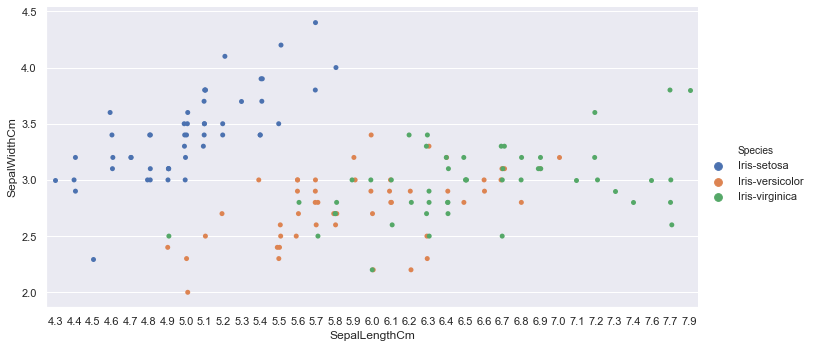

In [4]:
sns.catplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', aspect=2)

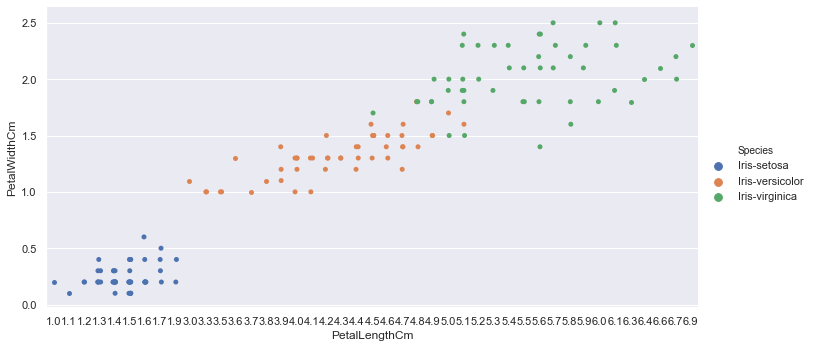

In [5]:
sns.catplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', aspect=2)

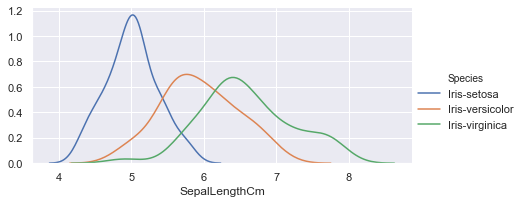

In [6]:
facet = sns.FacetGrid(df, hue="Species", aspect=2)
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend()

plt.show()

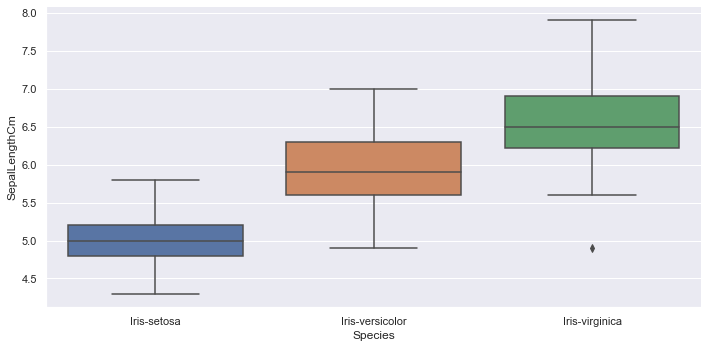

In [7]:
sns.catplot(kind='box', data=df, x='Species', y='SepalLengthCm', aspect=2)

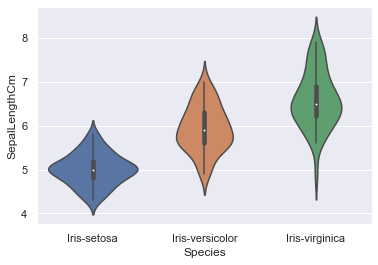

In [8]:

sns.violinplot(data=df, x='Species', y='SepalLengthCm')

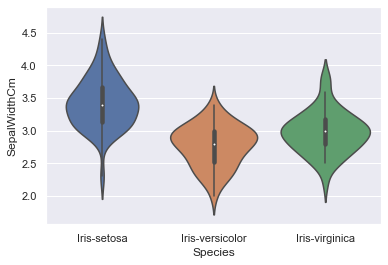

In [9]:

sns.violinplot(data=df, x='Species', y='SepalWidthCm')

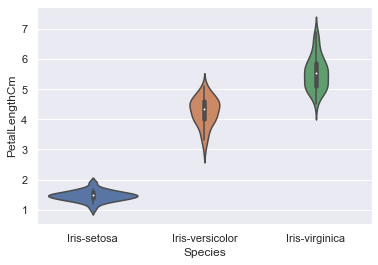

In [10]:
sns.violinplot(data=df, x='Species', y='PetalLengthCm')

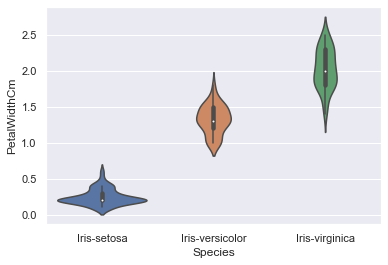

In [11]:
sns.violinplot(data=df, x='Species', y='PetalWidthCm')

==============================================

In [12]:
from sklearn.model_selection import train_test_split

# 훈련을 위한 특징부분과 정답부분 나누기
input_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target_data = df['Species']

# 자동으로 75%, 25%로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,6.7,3.1,4.7,1.5
2,4.7,3.2,1.3,0.2
134,6.1,2.6,5.6,1.4
11,4.8,3.4,1.6,0.2
139,6.9,3.1,5.4,2.1
...,...,...,...,...
103,6.3,2.9,5.6,1.8
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4
50,7.0,3.2,4.7,1.4


In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))
print('test set accuracy:', tree.score(x_test, y_test))

training set accuracy: 1.0
test set accuracy: 0.9736842105263158


In [14]:

prediction = tree.predict(x_test)
prediction

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [15]:

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train, y_train)

print('training set accuracy:', forest.score(x_train, y_train))
print('test set accuracy:', forest.score(x_test, y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

training set accuracy: 0.9910714285714286
test set accuracy: 1.0


array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa'], dtype=object)